# Comparison to CCL

This notebook compares the implementation from jax_cosmo to CCL

In [1]:
%pylab inline
import pyccl as ccl
import jax
from jax_cosmo import Cosmology, Background

Populating the interactive namespace from numpy and matplotlib


In [2]:
# We first define equivalent CCL and jax_cosmo cosmologies
cosmo_ccl = ccl.Cosmology(
    Omega_c=0.3, Omega_b=0.05, h=0.7, sigma8 = 0.8, n_s=0.96, Neff=0,
    transfer_function='eisenstein_hu', matter_power_spectrum='linear')

cosmo_jax = Background(Cosmology(Omega_c=0.3, Omega_b=0.05, h=0.7, sigma8 = 0.8, n_s=0.96,
                      Omega_k=0., w0=-1., wa=0))

/home/francois/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


## Comparing background cosmology

In [3]:
# Test array of scale factors
a = np.linspace(0.01, 1.)

Text(0, 0.5, 'radial comoving distance [Mpc]')

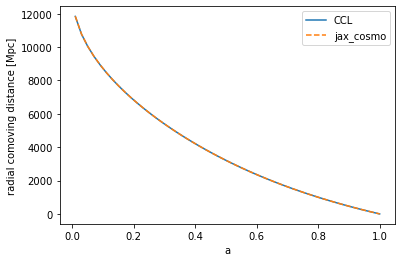

In [5]:
# Testing the radial comoving distance
chi_ccl = ccl.comoving_radial_distance(cosmo_ccl, a)
chi_jax = cosmo_jax.radial_comoving_distance(a)/cosmo_jax.h

plot(a, chi_ccl, label='CCL')
plot(a, chi_jax, '--', label='jax_cosmo')
legend()
xlabel('a')
ylabel('radial comoving distance [Mpc]')

Text(0, 0.5, 'angular comoving distance [Mpc]')

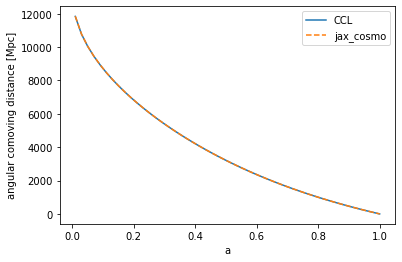

In [6]:
# Testing the angular comoving distance
chi_ccl = ccl.comoving_angular_distance(cosmo_ccl, a)
chi_jax = cosmo_jax.transverse_comoving_distance(a)/cosmo_jax.h

plot(a, chi_ccl, label='CCL')
plot(a, chi_jax, '--', label='jax_cosmo')
legend()
xlabel('a')
ylabel('angular comoving distance [Mpc]')

Text(0, 0.5, 'angular diameter distance [Mpc]')

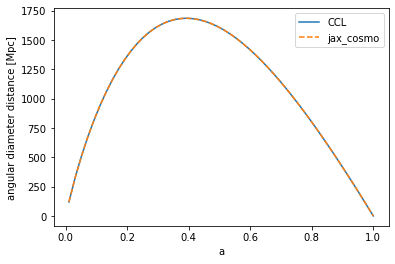

In [7]:
# Testing the angular diameter distance
chi_ccl = ccl.angular_diameter_distance(cosmo_ccl, a)
chi_jax = cosmo_jax.angular_diameter_distance(a)/cosmo_jax.h

plot(a, chi_ccl, label='CCL')
plot(a, chi_jax, '--', label='jax_cosmo')
legend()
xlabel('a')
ylabel('angular diameter distance [Mpc]')

Text(0, 0.5, 'Growth factor')

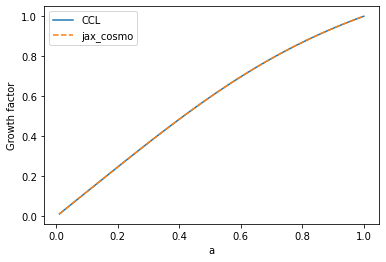

In [8]:
# Comparing the growth factor
plot(a, ccl.growth_factor(cosmo_ccl,a), label='CCL')
plot(a, cosmo_jax.growth_factor(a), '--', label='jax_cosmo')
legend()
xlabel('a')
ylabel('Growth factor')